



# README 📔
### 라이브러리 설치(finance-DataReader) 부분만 실행
### 런타임 - 런타임 다시 시작
해야 한글폰트랑 라이브러리가 정상적으로 설치 됩니다.





# 1. 라이브러리 설치 (finance-DataReader)

In [ ]:
# FinanceDataReader 설치
!pip install finance-DataReader

In [ ]:
# 한글 폰트
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
# Google Translate 패키지 설치
!pip install googletrans==4.0.0-rc1

In [ ]:
# candlestick2 그래프 라이브러리
!pip install mpl_finance
!pip upgrade mpl_finance

ERROR: unknown command "upgrade"


#2. 주식 종목 선택

In [ ]:
# 2-0 라이브러리 불러오기

import FinanceDataReader as fdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from matplotlib.ticker import FuncFormatter

# KRX 주식 가져오기
df=fdr.StockListing('KRX')
print(df)


        Code        ISU_CD      Name Market   Dept   Close ChangeCode  \
0     005930  KR7005930003      삼성전자  KOSPI          71700          1   
1     373220  KR7373220003  LG에너지솔루션  KOSPI         424500          2   
2     000660  KR7000660001    SK하이닉스  KOSPI         125600          2   
3     207940  KR7207940008  삼성바이오로직스  KOSPI         705000          2   
4     005935  KR7005931001     삼성전자우  KOSPI          57700          3   
...      ...           ...       ...    ...    ...     ...        ...   
2780  288490  KR7288490006     나라소프트  KONEX  일반기업부      80          1   
2781  217320  KR7217320001       썬테크  KONEX  일반기업부    2720          5   
2782  245450  KR7245450002    씨앤에스링크  KONEX  일반기업부    1599          2   
2783  308700  KR7308700004       테크엔  KONEX  일반기업부     570          1   
2784  322190  KR7322190000        베른  KONEX  일반기업부     109          2   

      Changes  ChagesRatio    Open    High     Low   Volume        Amount  \
0         500         0.70   71800   72100   7

In [ ]:
# 2-1 주식 검색,주식 선택,주식 df 선택 함수 정의

stock_company_name = None;

'''
주식 종목 범위로 검색
find_stock_by_range(0, 1)
return       Code      Name
       0   005930      삼성전자
'''
def find_stock_by_range(start, end):
    df = fdr.StockListing('KRX')
    print(df[['Code', 'Name']][start:end])


'''
종목 이름으로 선택
ex)
find_stock_by_name('삼성전자')
return '삼성전자 : 005930'
'''
def find_stock_code_by_name(name):
    # 전역 변수 stock_company_name 사용 선언
    global stock_company_name;
    df = fdr.StockListing('KRX')
    stock_info = df[df['Name'] == name]
    stock_company_name = stock_info['Name'].iloc[0]
    stock_code = stock_info['Code'].iloc[0]
    return stock_code

'''
d
ex)
get_stock_data('005930')
return 해당 주식 df
'''
def get_stock_data(stock_code):
    # 현재 날짜
    current_date = datetime.now().date()

    # 2년전 날짜
    two_year_ago_date = current_date - timedelta(days=730)

    stock_df = fdr.DataReader(stock_code, two_year_ago_date, current_date)
    return stock_df


In [ ]:
## 2-2 주식 종목 범위로 찾기
find_stock_by_range(0, 3)

     Code      Name
0  005930      삼성전자
1  373220  LG에너지솔루션
2  000660    SK하이닉스


In [ ]:
## 2-3 주식 종목 이름으로 선택
stock_code = find_stock_code_by_name('SK하이닉스')

000660


In [ ]:
## 2-4 주식 이름으로 해당 주식 데이터 가져오기
stock_df = get_stock_data(stock_code)

In [ ]:
print(stock_df.head())

              Open    High     Low   Close   Volume    Change
Date                                                         
2021-12-06  116000  119000  115500  118500  4318893  0.004237
2021-12-07  119000  122500  118000  121500  5112025  0.025316
2021-12-08  124000  125000  119500  120000  6168137 -0.012346
2021-12-09  120500  123500  119000  123500  5631833  0.029167
2021-12-10  120500  121500  119500  120500  2512642 -0.024291


#3. 데이터 전처리

In [ ]:
# 3-1 null값처리
# null 값이 있는지 확인
stock_df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Change    0
dtype: int64

In [ ]:
# 만약 첫번째 데이터가 null 값이라면 다음 데이터로 덮어씌움 (첫번째 데이터의 이전 값은 컬럼 속성명이기 때문)
# 첫번째 데이터가 아닌 다른데이터가 null 이라면 이전 데이터로 덮어씌움 (마지막 데이터의 다음 데이터는 없기 때문에 이전데이터로 덮어씌움)
if stock_df.iloc[0].isnull().any():
    stock_df.fillna(method='bfill', inplace=True)
else:
    stock_df.fillna(method='ffill', inplace=True)

# null 값이 없어졌는지 확인
stock_df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Change    0
dtype: int64

In [ ]:
# 3-2 (시가,고가,저가,거래량) 결측치 전처리

# 시가,고가,저가,거래량 컬럼
columns_to_check = ['Open', 'High', 'Low', 'Volume']

# 시가,고가,저가,거래량 중 결측된 값 (0) 찾기
rows_with_zero = stock_df[stock_df[columns_to_check] == 0].dropna(how='all').dropna(axis=1, how='all')

# 0인 데이터 삭제
cleaned_stock_df = stock_df.drop(rows_with_zero.index)

# 'Open', 'High', 'Low', 'Volume' 컬럼에서 0 으로 된 데이터가 남아있는지 확인
cleaned_stock_df[cleaned_stock_df[columns_to_check] == 0].dropna(how='all').dropna(axis=1, how='all')

""
Date


In [ ]:
cleaned_stock_df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-12-06,116000,119000,115500,118500,4318893,0.004237
2021-12-07,119000,122500,118000,121500,5112025,0.025316
2021-12-08,124000,125000,119500,120000,6168137,-0.012346
2021-12-09,120500,123500,119000,123500,5631833,0.029167
2021-12-10,120500,121500,119500,120500,2512642,-0.024291
...,...,...,...,...,...,...
2023-11-30,129900,133900,129900,133900,3625365,0.026840
2023-12-01,132200,133000,130800,132600,3641222,-0.009709
2023-12-04,133400,134600,131100,131100,2680820,-0.011312


# 4. 데이터 시각화

## 4-1 시각화 전 환경설정

In [ ]:
# 폰트 한글 설정
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

## 4-2 종가 그래프 시각화(Closing Price Graph)
- 이 그래프는 특정 기간 동안 주식의 종가를 나타냅니다.
- 투자자들에게 종가는 가장 중요한 가격 포인트 중 하나로 간주됩니다. 왜냐하면 장기간에 걸쳐 종가 데이터를 분석함으로써, 투자자들은 상승 추세, 하락 추세, 또는 횡보 추세를 식별할 수 있습니다. 이러한 추세는 미래의 가격 움직임을 예측하는 데 사용될 수 있습니다.

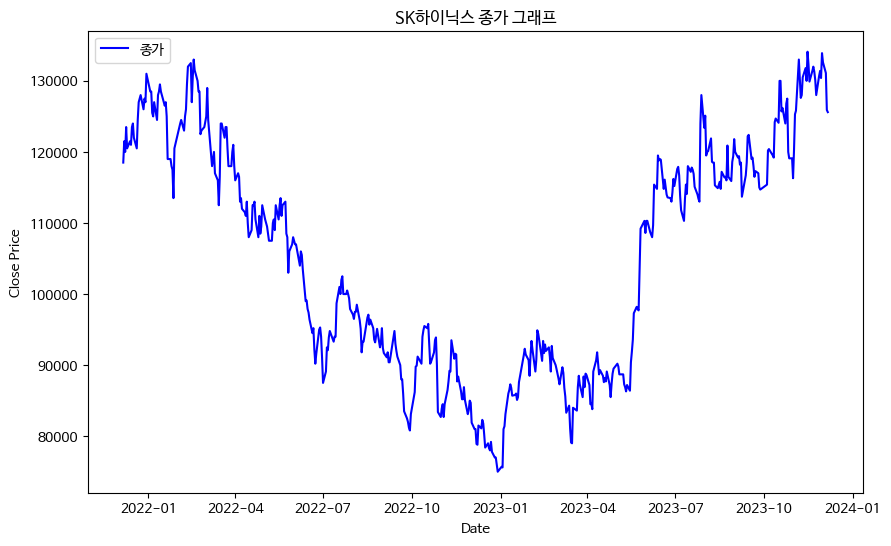

In [ ]:
# 종가 그래프 시각화
plt.figure(figsize=(10, 6))

sns.lineplot(x=cleaned_stock_df.index, y=cleaned_stock_df['Close'], color='blue', label='종가')
plt.title(stock_company_name+' 종가 그래프')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.show()


## 4-2 고가/저가 그래프 시각화 (High and Low Price Graph)
- 이 그래프는 특정 기간 동안 각 거래일의 최고 가격과 최저 가격을 나타냅니다.
- 고가는 매수자들의 최대 지불 의사를, 저가는 매도자들의 최소 수용 가격을 나타냅니다.
-  넓은 범위는 높은 변동성을, 좁은 범위는 낮은 변동성을 의미합니다. 투자자들은 이 정보를 사용하여 시장의 불안정성에 대비할 수 있습니다.

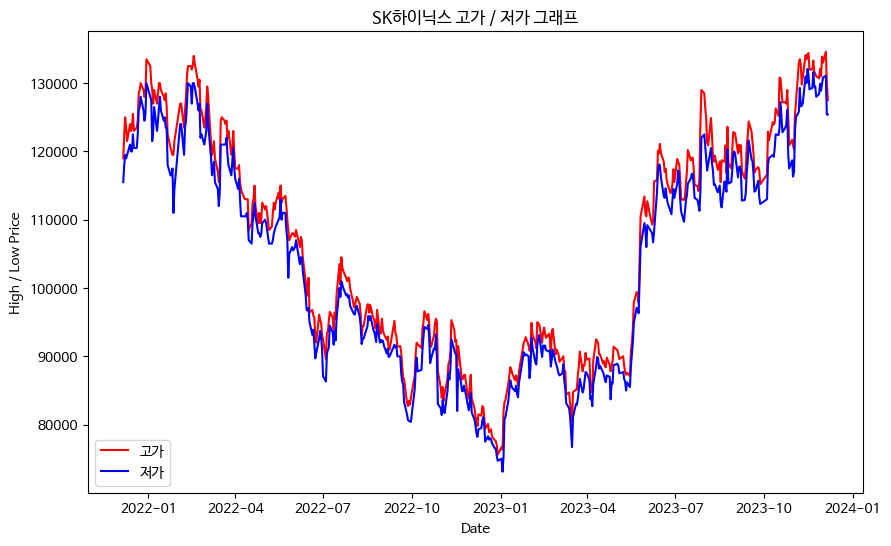

In [ ]:
# 고가,저가 그래프 시각화
plt.figure(figsize=(10, 6))
sns.lineplot(x=cleaned_stock_df.index, y=cleaned_stock_df['High'], color='red', label='고가')
sns.lineplot(x=cleaned_stock_df.index, y=cleaned_stock_df['Low'], color='blue', label='저가')
plt.title(stock_company_name+' 고가 / 저가 그래프')
plt.xlabel('Date')
plt.ylabel('High / Low Price')
plt.legend()

plt.show()

## 4-3 거래량 및 종가 그래프 시각화 (Volume and Close Graph)
- 거래량은 해당 주식이 얼마나 많이 거래되었는지를 나타냅니다.
- 높은 거래량은 가격 변화에 대한 시장의 확신을, 낮은 거래량은 불확실성 또는 관심 부족을 나타낼 수 있습니다.
- 거래량이 높은 날에 주가가 상승하거나 하락하는 패턴을 분석함으로써 시장의 강한 움직임을 확인 할 수 있습니다

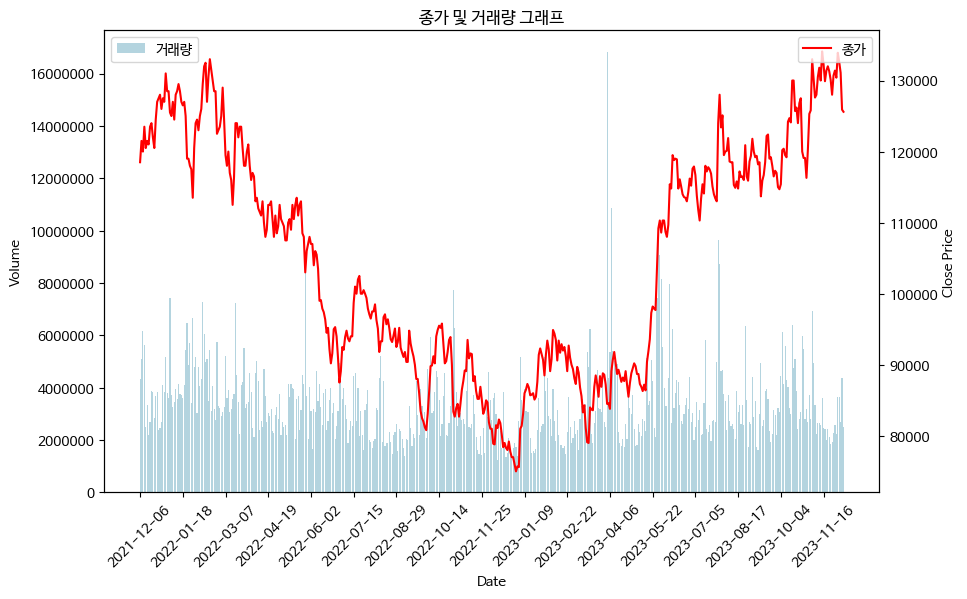

In [ ]:

# 날짜 포맷 변경을 위한 데이터 준비
dates = cleaned_stock_df.index
volume = cleaned_stock_df['Volume']
high_prices = cleaned_stock_df['Close']

# y축의 포맷을 변경하기 위한 포맷터 (람다를 이용해 숫자 형식을 변경)
formatter = FuncFormatter(lambda y, pos: "%d" % (y))
# 날짜 포맷 변경 (예: '2018-01-01 00:00:00' -> '2018-01-01')
formatted_dates = [datetime.strftime(pd.to_datetime(date), '%Y-%m-%d') for date in dates]


# 두 축을 가진 그래프 생성
fig, ax1 = plt.subplots(figsize=(10, 6))

# 바 그래프: 거래량
plt.gca().yaxis.set_major_formatter(formatter)
sns.barplot(x=formatted_dates, y=volume, ax=ax1, color='lightblue', label='거래량')
ax1.set_ylabel('Volume')
ax1.set_xlabel('Date')
ax1.set_title('종가 및 거래량 그래프')
ax1.legend(loc='upper left')
ax1.yaxis.set_major_formatter(formatter)

# 선 그래프: 고가
ax2 = ax1.twinx()
sns.lineplot(x=formatted_dates, y=high_prices, ax=ax2, color='red', label='종가')
ax2.set_ylabel('Close Price')
ax2.legend(loc='upper right')

# X축 레이블 각도 조정
ax1.set_xticklabels(formatted_dates, rotation=45)
plt.xticks(ticks=range(0, len(formatted_dates),30), labels=formatted_dates[::30], rotation=45)
plt.show()


## 4-4 이동 평균선 그래프 시각화 (Moving Average Graph)
- 이동 평균선은 주식 가격의 단기 및 장기 추세를 나타내는 데 사용됩니다.
- 가격이 이동 평균선 위에 있을 때 상승 추세, 아래에 있을 때 하락 추세로 해석됩니다.

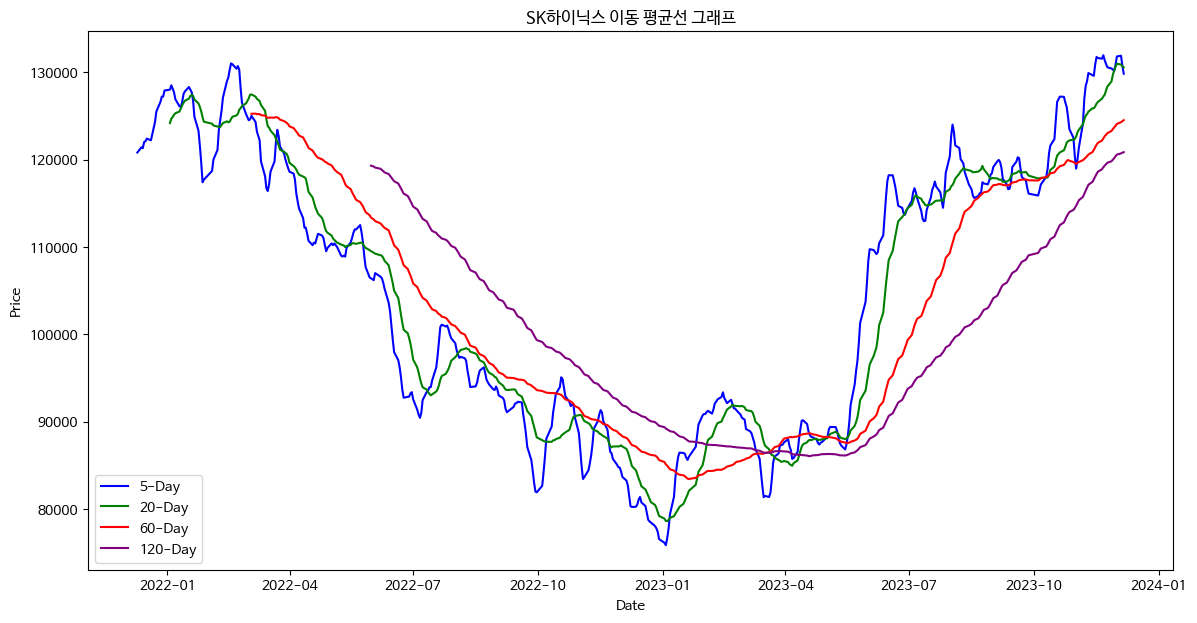

In [ ]:
# 이동 평균선 계산 후 컬럼에 삽입(5,20,60,120) 일
cleaned_stock_df['MA5'] = cleaned_stock_df['Close'].rolling(window=5).mean()
cleaned_stock_df['MA20'] = cleaned_stock_df['Close'].rolling(window=20).mean()
cleaned_stock_df['MA60'] = cleaned_stock_df['Close'].rolling(window=60).mean()
cleaned_stock_df['MA120'] = cleaned_stock_df['Close'].rolling(window=120).mean()
# 시각화
plt.figure(figsize=(14, 7))
plt.title(stock_company_name + ' 이동 평균선 그래프')
plt.plot(cleaned_stock_df.index, cleaned_stock_df['MA5'], label='5-Day', color='blue')
plt.plot(cleaned_stock_df.index, cleaned_stock_df['MA20'], label='20-Day', color='green')
plt.plot(cleaned_stock_df.index, cleaned_stock_df['MA60'], label='60-Day', color='red')
plt.plot(cleaned_stock_df.index, cleaned_stock_df['MA120'], label='120-Day', color='purple')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


## 4-5 캔들  (Candlestick Graph)
-  캔들스틱 차트는 가격의 움직임을 시각적으로 표현합니다.


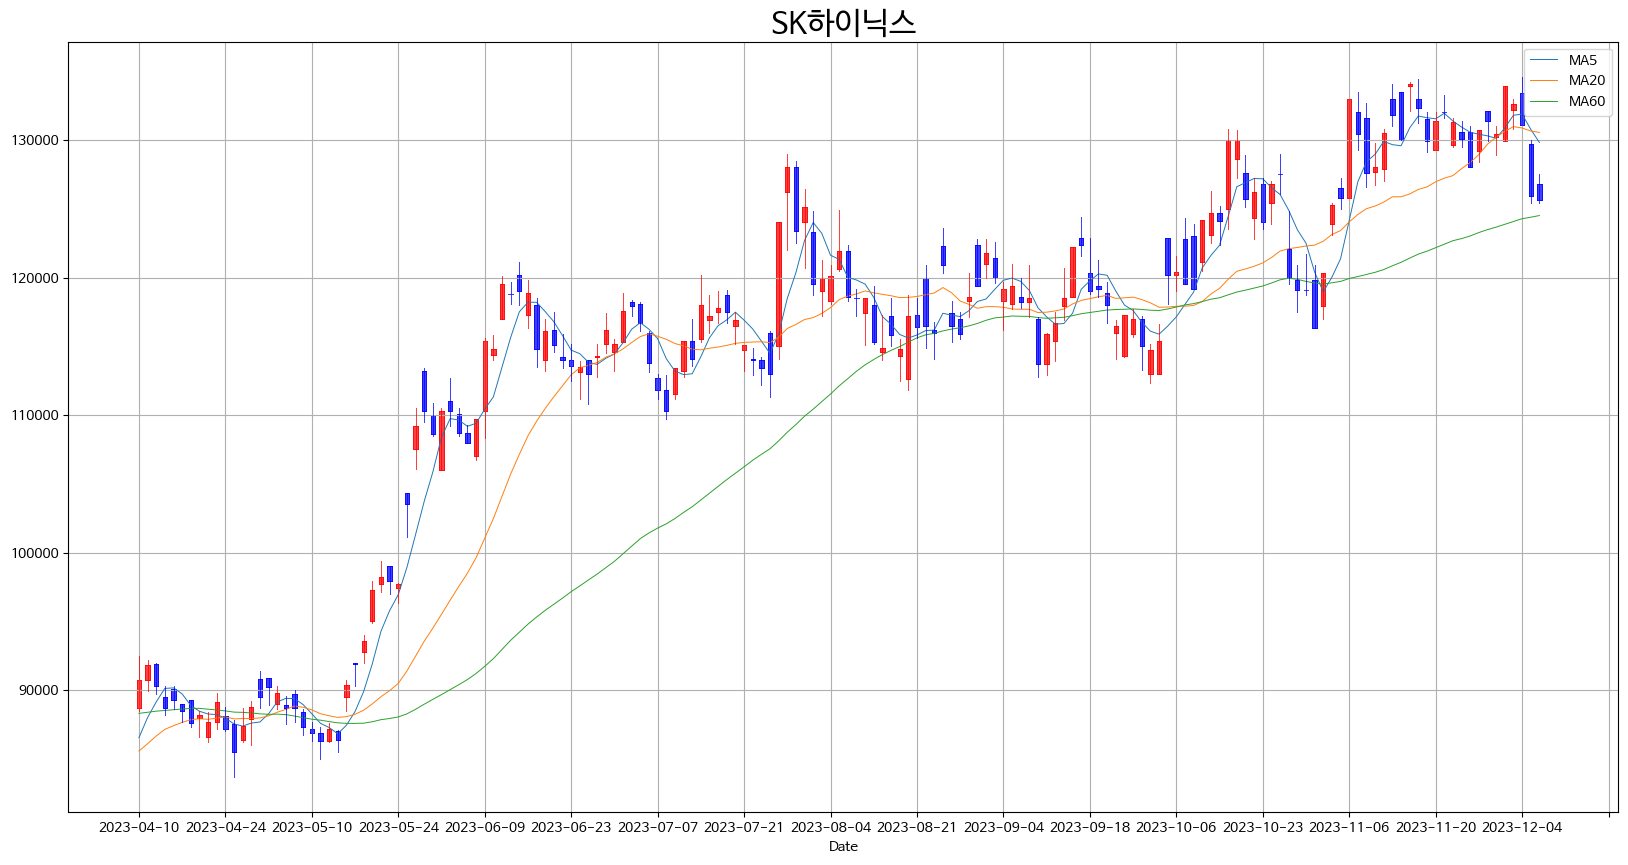

In [ ]:
import matplotlib.ticker as ticker
from mpl_finance import candlestick2_ohlc


current_date = datetime.now().date()

# 6년전 날짜
six_month_ago_date = current_date - timedelta(days=240)


end_date = pd.to_datetime(current_date)
recent_stock_df = cleaned_stock_df[six_month_ago_date:current_date]



fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
index = recent_stock_df.index.astype('str') # 캔들스틱 x축이 str로 들어감

# 이동평균선 그리기
ax.plot(index, recent_stock_df['MA5'], label='MA5', linewidth=0.7)
ax.plot(index, recent_stock_df['MA20'], label='MA20', linewidth=0.7)
ax.plot(index, recent_stock_df['MA60'], label='MA60', linewidth=0.7)

# X축 티커 숫자 20개로 제한
ax.xaxis.set_major_locator(ticker.MaxNLocator(20))

# 그래프 title과 축 이름 지정
ax.set_title(stock_company_name, fontsize=22)
ax.set_xlabel('Date')

# 캔들차트 그리기
candlestick2_ohlc(
                  ax,
                  recent_stock_df['Open'],
                  recent_stock_df['High'],
                  recent_stock_df['Low'],
                  recent_stock_df['Close'],
                  width=0.5,
                  colorup='r',
                  colordown='b')

ax.legend()
plt.grid()
plt.show()

# 5. 주가 예측


## 5-1 선형 회귀 다음 날 종가(Close Price)를 예측

In [ ]:
from sklearn.linear_model import LinearRegression

# 인덱스를 datetime 형식으로 변환 (index로 되어있음)
cleaned_stock_df.index = pd.to_datetime(cleaned_stock_df.index)

# 필요한 컬럼 선택
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

# 전체 데이터로 모델 훈련
model = LinearRegression()
model.fit(cleaned_stock_df[features], cleaned_stock_df[target])

# 마지막 날짜로부터 하루 후 날짜 생성
last_date = cleaned_stock_df.index.max()
next_day = [last_date + timedelta(days=1)]

# 미래 데이터 예측을 위한 특성 생성 (마지막 알려진 값을 사용)
last_known_values = cleaned_stock_df.iloc[-1][features].values.reshape(1, -1)

# 다음 날 'Close' 값 예측
predicted_next_close = model.predict(last_known_values)

# 예측된 다음 날 데이터를 DataFrame으로 변환
predicted_next_day_df = pd.DataFrame(predicted_next_close, index=next_day, columns=['Predicted'])


# 결과 확인
predicted_next_day_df


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,Predicted
2023-12-07,126169.423319


In [ ]:
# 'Predicted_Close' 열을 추가합니다. 모든 초기값은 NaN으로 설정합니다.
cleaned_stock_df['Predicted'] = np.nan

# 첫 번째 행에 'Predicted_Close' 값을 설정합니다.
# 예측 데이터프레임에서 값 가져오기
predicted_value = predicted_next_day_df['Predicted'].iloc[0]

# cleaned_stock_df의 첫 번째 행에 값을 넣습니다.
cleaned_stock_df['Predicted'].iloc[0] = predicted_value

# 결과를 확인합니다.
print(cleaned_stock_df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 495 entries, 2021-12-06 to 2023-12-06
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       495 non-null    int64  
 1   High       495 non-null    int64  
 2   Low        495 non-null    int64  
 3   Close      495 non-null    int64  
 4   Volume     495 non-null    int64  
 5   Change     495 non-null    float64
 6   MA5        491 non-null    float64
 7   MA20       476 non-null    float64
 8   MA60       436 non-null    float64
 9   MA120      376 non-null    float64
 10  Predicted  1 non-null      float64
dtypes: float64(6), int64(5)
memory usage: 62.6 KB
None


<ipython-input-22-58e77fbdead6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_stock_df['Predicted'].iloc[0] = predicted_value


In [ ]:
cleaned_stock_df['code'] = str(stock_code)
cleaned_stock_df['code'] = np.nan
cleaned_stock_df['code'].iloc[0] = str(stock_code)

<ipython-input-23-3f40f5cf5fc3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_stock_df['code'].iloc[0] = str(stock_code)


In [ ]:
cleaned_stock_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 495 entries, 2021-12-06 to 2023-12-06
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       495 non-null    int64  
 1   High       495 non-null    int64  
 2   Low        495 non-null    int64  
 3   Close      495 non-null    int64  
 4   Volume     495 non-null    int64  
 5   Change     495 non-null    float64
 6   MA5        491 non-null    float64
 7   MA20       476 non-null    float64
 8   MA60       436 non-null    float64
 9   MA120      376 non-null    float64
 10  Predicted  1 non-null      float64
 11  code       1 non-null      object 
dtypes: float64(6), int64(5), object(1)
memory usage: 66.4+ KB


In [ ]:
cleaned_stock_df


,Open,High,Low,Close,Volume,Change,MA5,MA20,MA60,MA120,Predicted,code
Date,,,,,,,,,,,,
2021-12-06,116000,119000,115500,118500,4318893,0.004237,NaN,NaN,NaN,NaN,126169.423319,000660
2021-12-07,119000,122500,118000,121500,5112025,0.025316,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-08,124000,125000,119500,120000,6168137,-0.012346,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-09,120500,123500,119000,123500,5631833,0.029167,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-10,120500,121500,119500,120500,2512642,-0.024291,120800.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-30,129900,133900,129900,133900,3625365,0.026840,130880.0,130630.0,123866.666667,120378.333333,NaN,NaN
2023-12-01,132200,133000,130800,132600,3641222,-0.009709,131800.0,130970.0,124076.666667,120569.166667,NaN,NaN
2023-12-04,133400,134600,131100,131100,2680820,-0.011312,131880.0,130875.0,124275.000000,120700.000000,NaN,NaN


## 이동 평균선으로 예측
- 주식의 최근 데이터를 분석하여 투자 의견을 생성

In [ ]:
# 최근 데이터 가져오기
recent_data = cleaned_stock_df.tail(1)


# 이동 평균선 분석
ma5 = recent_data['MA5'].iloc[0]
ma20 = recent_data['MA20'].iloc[0]
ma60 = recent_data['MA60'].iloc[0]
ma120 = recent_data['MA120'].iloc[0]
close = recent_data['Close'].iloc[0]

# 최근 5일간의 데이터 추출
recent_data = cleaned_stock_df.tail(5)
# 최근 5일간 평균 거래량 계산
average_volume_last_5_days = recent_data['Volume'].mean()

# 이전 5일간의 데이터 추출 (최근 5일을 제외한 그 이전의 5일)
previous_data = cleaned_stock_df.iloc[-10:-5]
# 이전 5일간 평균 거래량 계산
average_volume_previous_5_days = previous_data['Volume'].mean()



# 투자 의견 생성
opinion = ""
if close > ma5 > ma20 > ma60 > ma120:
    opinion += "동종목은 지속적인 우상향의 모습을 유지하고 있습니다. "
    if close > ma5:
        opinion += "현재 보유중인 고객은 5일 이동평균선 이탈 시 이익실현하고, "
    if close < ma5:
        opinion += "신규 진입고객은 조정 시에만 접근하도록 하겠습니다. "
elif close < ma5:
    opinion += "주가가 5일 이동평균선 아래로 내려왔습니다. 단기적인 조정이 예상되며, "
    opinion += "추가 하락을 고려하여 신중한 접근이 필요합니다. "
else:
    opinion += "최근 고점에서 급등락을 반복하며 차익물량이 출현하고 있는 모습입니다. "
    opinion += "전고점을 돌파하지 못할 시에는 추세가 하락 전환될 가능성도 있으므로, 이 점을 숙지하고 매매에 임하시면 바람직할 것으로 여겨집니다."

# 거래량 변화에 대한 의견 추가
if average_volume_last_5_days > average_volume_previous_5_days:
    volume_opinion = "그러나 최근 5일간의 평균 거래량이 이전 5일보다 증가했습니다. "
    volume_opinion += "이는 시장의 증가된 관심과 활동을 나타내며, 주가의 반등 가능성을 시사할 수 있습니다. "
elif average_volume_last_5_days < average_volume_previous_5_days:
    volume_opinion = "또한, 최근 5일간의 평균 거래량이 이전 5일보다 감소했습니다. "
    volume_opinion += "이는 시장의 관심과 활동이 줄어들고 있음을 나타내며, 주가 하락에 대한 추가적인 신호일 수 있습니다. "
else:
    volume_opinion = "최근 5일간과 이전 5일간의 평균 거래량이 비슷합니다. "
    volume_opinion += "이는 시장의 안정적인 관심을 반영하고 있으며, 큰 변동성 없이 안정적인 움직임이 예상됩니다. "

# 기존 투자 의견에 거래량 분석 결과 추가
opinion += "\n" + volume_opinion

# 투자 의견 출력
print(opinion)

cleaned_stock_df['opinion'] = np.nan
cleaned_stock_df['opinion'].iloc[0] = opinion



<ipython-input-26-c11f056009c2>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_stock_df['opinion'].iloc[0] = opinion


주가가 5일 이동평균선 아래로 내려왔습니다. 단기적인 조정이 예상되며, 추가 하락을 고려하여 신중한 접근이 필요합니다. 
그러나 최근 5일간의 평균 거래량이 이전 5일보다 증가했습니다. 이는 시장의 증가된 관심과 활동을 나타내며, 주가의 반등 가능성을 시사할 수 있습니다. 


In [ ]:
# 계산된 이동 평균선 열 삭제
cleaned_stock_df.drop(['MA5', 'MA20', 'MA60', 'MA120'], axis=1, inplace=True)

# 데이터프레임 정보 확인
cleaned_stock_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 495 entries, 2021-12-06 to 2023-12-06
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       495 non-null    int64  
 1   High       495 non-null    int64  
 2   Low        495 non-null    int64  
 3   Close      495 non-null    int64  
 4   Volume     495 non-null    int64  
 5   Change     495 non-null    float64
 6   Predicted  1 non-null      float64
 7   code       1 non-null      object 
 8   opinion    1 non-null      object 
dtypes: float64(2), int64(5), object(2)
memory usage: 54.8+ KB


#6. 해당 종목 데이터 엑셀 파일로 다운

In [ ]:
# 해당 종목 Name 영어로 변경
from googletrans import Translator, LANGUAGES
from google.colab import files

# 번역기 초기화
translator = Translator()


# 주식명을 영어로 번역
def translate_stock_name_to_eng(name):

    translated = translator.translate(name, src='ko', dest='en').text

    # 띄어쓰기를 언더스코어로 변경하고 대문자로 변환
    formatted_name = translated.replace(' ', '_').upper()

    return formatted_name

# 예시: '삼성전자'를 영어로 번역 (삼성전자 to Samsung)
translated_name = translate_stock_name_to_eng(stock_company_name)
print(translated_name)


SK_HYNIX


In [ ]:
cleaned_stock_df.to_excel(translated_name+'_data.xlsx')

# 파일 다운로드
files.download(translated_name+'_data.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>